In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

pd_data = pd.read_csv(url, encoding='cp949', header = None)
pd_data.columns = ['구매가', '유지비용', '문갯수', '탑승인원', '수납공간', '안전도', '만족도']
pd_data.tail()

,구매가,유지비용,문갯수,탑승인원,수납공간,안전도,만족도
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


- 구매가가 만족도에 미치는 영향     
    - 산점도 , x축 구매가, y축 만족도
    - y축 vhigh , x축 만족도
- 구매가가 높은 차량이 안전도가 높은가
- 수납공간이 크면 탑승인원도 많은가.

      구매가    만족도  안전도
4     low  unacc  258
8     med  unacc  268
1    high  unacc  324
11  vhigh  unacc  360
2     low    acc   89
6     med    acc  115
0    high    acc  108
10  vhigh    acc   72
3     low   good   46
7     med   good   23
5     low  vgood   39
9     med  vgood   26


/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_71577/58780868.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(2,2,2)


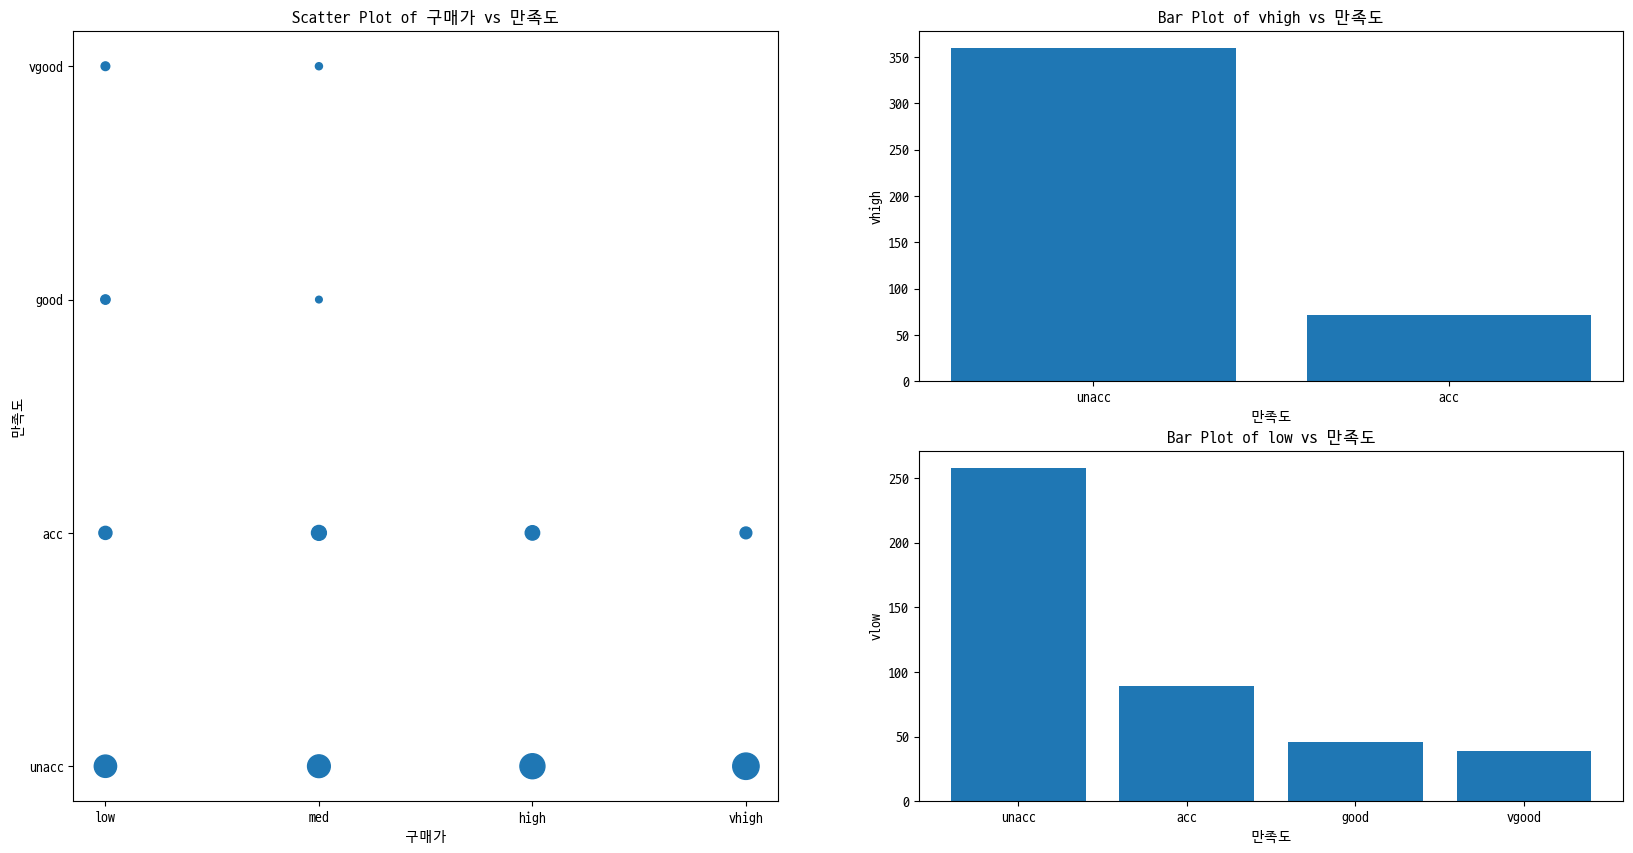

In [19]:
from matplotlib import font_manager, rc

font_fname = 'D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

from pandas.api.types import CategoricalDtype

price_category = CategoricalDtype(categories=["low", "med", "high", "vhigh"], ordered = True)
eval_category = CategoricalDtype(categories=["unacc", "acc", "good", "vgood"], ordered = True)

g1 = pd_data.groupby(['구매가', '만족도'])
s3 = g1['안전도'].count()
s3 = s3.reset_index()
s3['구매가'] = s3['구매가'].astype(price_category)
s3['만족도'] = s3['만족도'].astype(eval_category)
s3.sort_values('구매가', inplace = True)
s3.sort_values('만족도', inplace = True)
print(s3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1 = plt.subplot(1,2,1)
ax1.scatter(s3['구매가'], s3['만족도'], s=s3['안전도'])
# ax1.scatter(pd_data['구매가'], pd_data['만족도'], s=200)
ax1.set_xlabel('구매가')
ax1.set_ylabel('만족도')
ax1.set_title('Scatter Plot of 구매가 vs 만족도')


vhigh_data = pd_data[pd_data['구매가'] == 'vhigh']
vhigh_counts = vhigh_data['만족도'].value_counts()

index = np.arange(len(vhigh_counts))
ax2 = plt.subplot(2,2,2)
ax2.bar(index, vhigh_counts)
ax2.set_xlabel('만족도')
ax2.set_ylabel('vhigh')
ax2.set_title('Bar Plot of vhigh vs 만족도')
ax2.set_xticks(index, vhigh_counts.index)



vlow_data = pd_data[pd_data['구매가'] == 'low']
vlow_counts = vlow_data['만족도'].value_counts()

index = np.arange(len(vlow_counts))
ax2 = plt.subplot(2,2,4)
ax2.bar(index, vlow_counts)
ax2.set_xlabel('만족도')
ax2.set_ylabel('vlow')
ax2.set_title('Bar Plot of low vs 만족도')
ax2.set_xticks(index, vlow_counts.index)

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

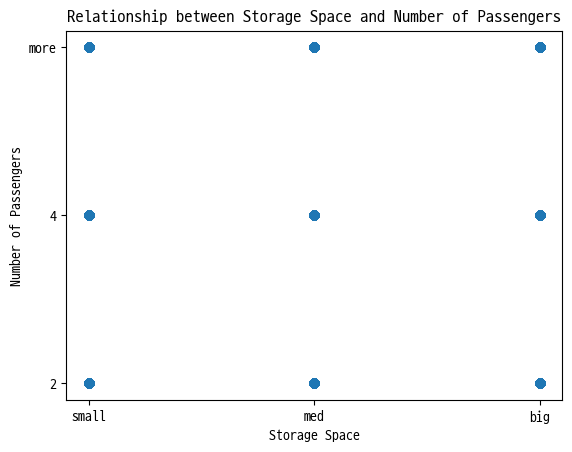

In [22]:
storage_space = pd_data['수납공간']
passengers = pd_data['탑승인원']

# Plotting the data
plt.scatter(storage_space, passengers)

# Adding labels and title
plt.xlabel('Storage Space')
plt.ylabel('Number of Passengers')
plt.title('Relationship between Storage Space and Number of Passengers')
plt.show

/var/folders/br/8bbtv7t175s4k3b2shs9n46m0000gn/T/ipykernel_71577/29531066.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(2,2,2)


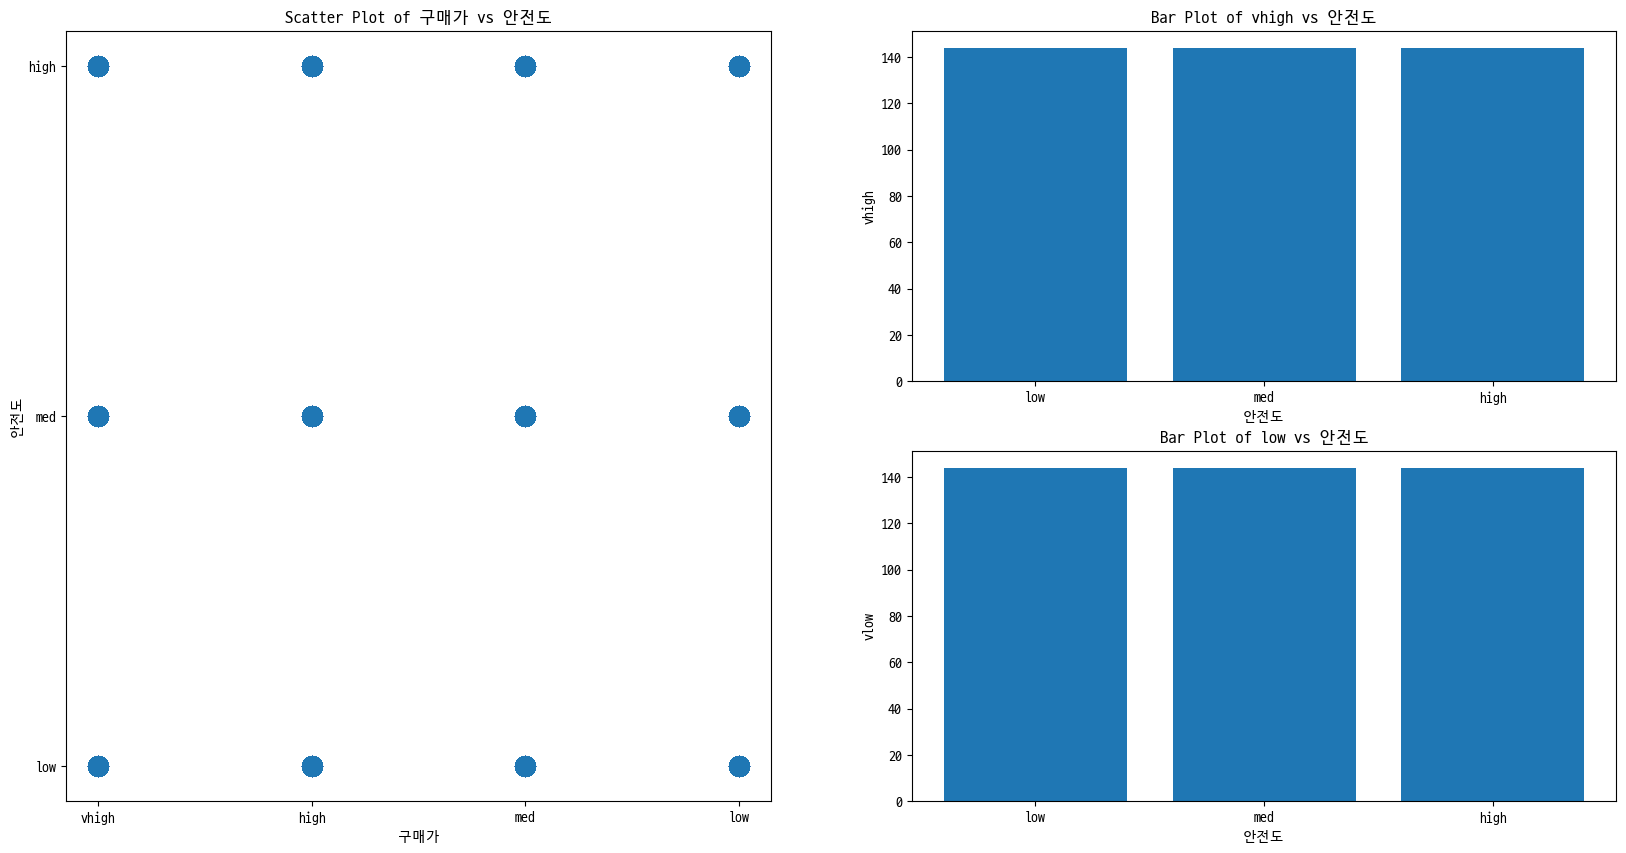

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1 = plt.subplot(1,2,1)
ax1.scatter(pd_data['구매가'], pd_data['안전도'], s=200)
ax1.set_xlabel('구매가')
ax1.set_ylabel('안전도')
ax1.set_title('Scatter Plot of 구매가 vs 안전도')

vhigh_data = pd_data[pd_data['구매가'] == 'vhigh']
vhigh_counts = vhigh_data['안전도'].value_counts()

index = np.arange(len(vhigh_counts))
ax2 = plt.subplot(2,2,2)
ax2.bar(index, vhigh_counts)
ax2.set_xlabel('안전도')
ax2.set_ylabel('vhigh')
ax2.set_title('Bar Plot of vhigh vs 안전도')
ax2.set_xticks(index, vhigh_counts.index)



vlow_data = pd_data[pd_data['구매가'] == 'low']
vlow_counts = vlow_data['안전도'].value_counts()

index = np.arange(len(vlow_counts))
ax2 = plt.subplot(2,2,4)
ax2.bar(index, vlow_counts)
ax2.set_xlabel('안전도')
ax2.set_ylabel('vlow')
ax2.set_title('Bar Plot of low vs 안전도')
ax2.set_xticks(index, vlow_counts.index)

plt.show()


In [11]:
g1 = pd_data.groupby(['구매가', '만족도'])
s3 = g1['안전도'].count()
s3 = s3.reset_index()
print(s3)

      구매가    만족도  안전도
0    high    acc  108
1    high  unacc  324
2     low    acc   89
3     low   good   46
4     low  unacc  258
5     low  vgood   39
6     med    acc  115
7     med   good   23
8     med  unacc  268
9     med  vgood   26
10  vhigh    acc   72
11  vhigh  unacc  360


In [13]:
ax1.scatter(s3['구매가'], s3['만족도'], s=s3['안전도'])

In [20]:
g = @(x,y,z) (x^2 + 9/4*y^2 + z^2 - 1)^3 - x^2 * z^3 - 9 / 80 * y^2 * z^3;
figure
fimplicit3(g)
grid on
axis equal

SyntaxError: invalid syntax (4229338167.py, line 1)